In [1]:
#load packages and modules
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

2022-11-07 13:58:23.529182: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-07 13:58:23.529221: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#load data
(X_train,Y_train),(X_valid,Y_valid) = mnist.load_data()

In [3]:
#preprocessing the data
X_train =X_train .reshape(60000,784).astype('float32')
X_valid =X_valid .reshape(10000,784).astype('float32')

In [4]:
#normalization
X_train /=255
X_valid /=255

In [5]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [6]:
#convert the labels to one hot representation.
from keras import utils as np_utils
n_classes=10
Y_train=keras.utils.np_utils.to_categorical(Y_train,n_classes)
Y_valid=keras.utils.np_utils.to_categorical(Y_valid,n_classes)

In [7]:
Y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [8]:
#Defining the model
model=Sequential()

2022-11-07 13:37:41.165956: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-07 13:37:41.166005: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-07 13:37:41.166027: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyterhub): /proc/driver/nvidia/version does not exist
2022-11-07 13:37:41.180817: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
#Adding dense layer
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))

In [10]:
#Adding the final layer
model.add(Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
#compile the network
model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [13]:
#train
history=model.fit(X_train,Y_train,batch_size=128,epochs=150,verbose=1)

2022-11-07 13:39:16.121633: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/150
469/469 [==============================] - 2s 2ms/step - loss: 0.0975 - accuracy: 0.1124
Epoch 2/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0917 - accuracy: 0.1198
Epoch 3/150
469/469 [==============================] - 1s 1ms/step - loss: 0.0906 - accuracy: 0.1496
Epoch 4/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.1714
Epoch 5/150
469/469 [==============================] - 1s 1ms/step - loss: 0.0895 - accuracy: 0.1845
Epoch 6/150
469/469 [==============================] - 1s 1ms/step - loss: 0.0891 - accuracy: 0.1920
Epoch 7/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0887 - accuracy: 0.1970
Epoch 8/150
469/469 [==============================] - 1s 1ms/step - loss: 0.0883 - accuracy: 0.2017
Epoch 9/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0880 - accuracy: 0.2071
Epoch 10/150
469/469 [==============================] - 1s 2ms/step - loss: 0.0877 - accura

In [15]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
X, Y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_valid, Y_train,Y_valid = train_test_split(X, Y, stratify=Y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

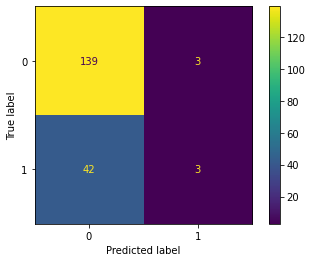

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Y_pred = clf.predict(X_valid)
cm = confusion_matrix(Y_valid, Y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()